<a href="https://colab.research.google.com/github/37stu37/FFE/blob/master/Celular%20Automaton%20for%20Wildfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

In [0]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [35]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!ls '/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE'

buildingsFootprints.cpg  FuelMap.cpg	    log_rasterize.txt  Welly_region.cpg
buildingsFootprints.dbf  FuelMap.dbf	    merge.dbf	       Welly_region.dbf
buildingsFootprints.prj  FuelMap.prj	    merge.mshp	       Welly_region.prj
buildingsFootprints.qpj  FuelMap.qpj	    merge.prj	       Welly_region.qpj
buildingsFootprints.shp  FuelMapRaster.tif  merge.qpj	       Welly_region.shp
buildingsFootprints.shx  FuelMap.shp	    merge.shp	       Welly_region.shx
FFE.qgs.qgz		 FuelMap.shx	    merge.shx


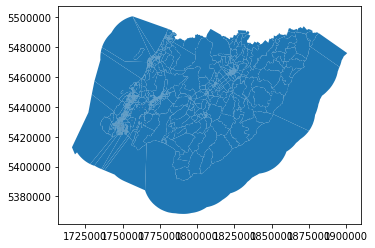

In [37]:
fuel_map = gpd.read_file('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/merge.shp')
fuel_map.plot()

In [0]:
# shake_map = gpd.read_file('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/shake.shp')

In [39]:
fuel_map.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - onshore
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
fuel_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68813 entries, 0 to 68812
Data columns (total 35 columns):
Source        68813 non-null object
OBJECTID      68813 non-null int64
Meshblock     5237 non-null object
MeshblockN    5237 non-null object
AreaUnitCo    5237 non-null object
AreaUnitNa    5237 non-null object
UrbanAreaC    5237 non-null object
UrbanAreaT    5237 non-null object
UrbanAreaN    5237 non-null object
TLACode       5237 non-null object
TLAName       5237 non-null object
WardCode      5237 non-null object
WardName      5237 non-null object
CommunityB    5237 non-null object
Communit_1    5237 non-null object
TLASubdivi    5237 non-null object
TLASubdi_1    5237 non-null object
RegionalCo    5237 non-null object
Regional_1    5237 non-null object
GeneralCon    5237 non-null object
GeneralC_1    5237 non-null object
MaoriConst    5237 non-null object
MaoriCon_1    5237 non-null object
GeneralEle    5237 non-null object
GeneralE_1    5237 non-null object
MaoriEl

In [41]:
fuel_map.SHAPE_Area.min()

0.00026637

In [45]:
!pip install rasterio[s3]

     |████████████████████████████████| 18.0MB 1.3MB/s 


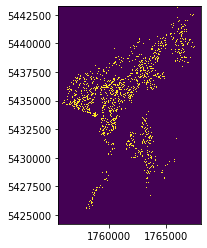

In [46]:
import rasterio
from rasterio.plot import show

raster = rasterio.open('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/FuelMapRaster.tif')
show(raster)

In [49]:
from osgeo import gdal_array
raster = gdal_array.LoadFile('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/FuelMapRaster.tif')
type(raster)

numpy.ndarray

In [0]:
import numpy as np
import pandas as pd
import imageio
import random

# Cells
# 1 = Clear, 2 = Fuel, 3 = Fire


In [0]:
df = pd.DataFrame(raster)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026 entries, 0 to 19025
Columns: 12447 entries, 0 to 12446
dtypes: float32(12447)
memory usage: 903.4 MB


In [87]:
df.shape

(19026, 12447)

In [85]:
wind_df = pd.read_csv('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/WindScenariosCopy.csv')
wind_df.head()
wind_df.iloc[0,2]

' buffer'

In [0]:
# states hold the state of each cell
states = df
# set the cells on fire!!!
x_ignition = random.uniform(0, df.shape[0])
y_ignition = random.uniform(0, df.shape[1])
df.iloc[x_ignition, y_ignition] = 3

# wind scenarios
wind_df = pd.read('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/WindScenariosCopy.csv')
wind_direction = wind_df.iloc[random.uniform(0, wind_df.shape[0]), 2]
critical_distance = !!!!!!!!!!!!!!!!!

# set up conditions
wind_scenarios = 100
total_steps = 300
# randomize wind direction and strength 
for wind in range(wind_scenarios):
  for t in range(1,total_steps):
      # Make a copy of the original states
      states[t] = states[t-1].copy()

      for x in range(1,terrain_size[0]-1):
          for y in range(1,terrain_size[1]-1):

              if states[t-1,x,y] == 2: # It's on fire
                  states[t,x,y] = 0 # Put it out and clear it
                  
                  # If there's fuel surrounding it
                  # set it on fire!
                  if states[t-1,x+1,y] == 1: 
                      states[t,x+1,y] = 2
                  if states[t-1,x-1,y] == 1:
                      states[t,x-1,y] = 2
                  if states[t-1,x,y+1] == 1:
                      states[t,x,y+1] = 2
                  if states[t-1,x,y-1] == 1:
                      states[t,x,y-1] = 2

In [0]:
# states hold the state of each cell
states = np.zeros((total_time,*terrain_size))
# initialize states by creating random fuel and clear cells
states[0] = np.random.choice([0,1],size=terrain_size,p=[1-prob,prob])
# set the middle cell on fire!!!
states[0,terrain_size[0]//2,terrain_size[1]//2] = 2

for t in range(1,total_time):
    # Make a copy of the original states
    states[t] = states[t-1].copy()

    for x in range(1,terrain_size[0]-1):
        for y in range(1,terrain_size[1]-1):

            if states[t-1,x,y] == 2: # It's on fire
                states[t,x,y] = 0 # Put it out and clear it
                
                # If there's fuel surrounding it
                # set it on fire!
                if states[t-1,x+1,y] == 1: 
                    states[t,x+1,y] = 2
                if states[t-1,x-1,y] == 1:
                    states[t,x-1,y] = 2
                if states[t-1,x,y+1] == 1:
                    states[t,x,y+1] = 2
                if states[t-1,x,y-1] == 1:
                    states[t,x,y-1] = 2

In [0]:
colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)

# Color
for t in range(states.shape[0]):
    for x in range(states[t].shape[0]):
        for y in range(states[t].shape[1]):
            value = states[t,x,y].copy()

            if value == 0:
                colored[t,x,y] = [139,69,19] # Clear
            elif value == 1: 
                colored[t,x,y] = [0,255,0]   # Fuel
            elif value == 2: 
                colored[t,x,y] = [255,0,0]   # Burning
            
# Crop
cropped = colored[:200,1:terrain_size[0]-1,1:terrain_size[1]-1]

imageio.mimsave('./video.gif', cropped)